In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import re


In [28]:
data=pd.read_csv('DataTrain.csv')

In [29]:
data

id                                               text sentiment  \
0        379                              lucky! that`s awesome  positive   
1      24124                    Im glad i can make sumone smile  positive   
2       4286  My teratoma has a cavity and is experiencing m...  negative   
3       1783  On JACkSOnVILLe be@Ch wAlkiNG in The COLD ****...  negative   
4       5581                                               Kpai  positive   
...      ...                                                ...       ...   
31227   1206  Still feel like craaaap and like everyone on e...   neutral   
31228   8103                           Doesn't sync to calendar  negative   
31229   9067  after the update widget stopped reacting but a...   neutral   
31230   1407         Bye ! Have a great time being whisked away  positive   
31231  11654  I`mdraggingmyselfoutofthelowpoint.Slowly.Andwi...   neutral   

             date      time  Measure of Evidence Strength of sent message  \
0      2014-11-22  17:26:20                                      0.901658   
1      2018-07-22  07:58:08                                      0.012167   
2      2015-06-26  02:52:12                                      0.603517   
3      2020-12-05  23:53:36                                      0.814155   
4      2018-07-15  03:49:50                                      0.684390   
...           ...       ...                                           ...   
31227  2014-04-28  08:39:17                                      0.273405   
31228  2019-04-14  18:49:32                                      0.447326   
31229  2015-09-09  21:02:54                                      0.559709   
31230  2015-05-04  00:14:59                                      0.057169   
31231  2020-05-01  14:54:08                                      0.562946   

                                    sent message address  \
0      901 Darren Junction Apt. 862\nWest Carlaland, ...   
1                       Unit 5916 Box 9073\nDPO AE 63754   
2                56947 Brooks Loop\nSouth John, WV 93156   
3                    918 Sims River\nNormaland, AL 09337   
4        7721 Rebecca Squares\nEast Michaelton, VA 57699   
...                                                  ...   
31227                   PSC 9351, Box 5955\nAPO AP 67591   
31228                   PSC 2542, Box 5917\nAPO AA 27164   
31229           8182 Joseph Hollow\nDenisebury, VA 26502   
31230        88301 Franklin Gateway\nTuckerton, TN 98202   
31231  9884 Joyce Knolls Apt. 827\nWest Mariaville, I...   

                                received message address  sender age  \
0        2002 Jackson Ridges\nNew Kevinchester, MA 86337          44   
1         77157 Fletcher Walk\nSouth Hollyfurt, VI 34801          34   
2             8471 Marco Village\nNew Jennifer, AL 91049          13   
3        6473 Oneal River\nLake Stephaniemouth, AZ 15555          77   
4      07031 Lauren Spur Apt. 500\nLake Michelle, LA ...          75   
...                                                  ...         ...   
31227                         USCGC Parker\nFPO AA 85304          68   
31228  69986 Mayer Radial\nEast Alexandramouth, GA 61359          74   
31229  12914 Angela Keys Apt. 744\nBrittanyborough, T...          37   
31230    07683 Hamilton Station\nElizabethbury, PR 07168          32   
31231      348 Marcus Expressway\nNew Jennifer, KY 45283          64   

      Message Channel sender gender receiver gender  
0               email          male            male  
1            chat app          male            male  
2        social media          male          female  
3               email        female          female  
4               email          male            male  
...               ...           ...             ...  
31227        chat app        female            male  
31228           email        female            male  
31229    social media          male            male  
31230        chat app        femal

In [30]:
data['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31232 non-null  int64  
 1   text                                          31232 non-null  object 
 2   sentiment                                     31232 non-null  object 
 3   date                                          31232 non-null  object 
 4   time                                          31232 non-null  object 
 5   Measure of Evidence Strength of sent message  31232 non-null  float64
 6   sent message address                          31232 non-null  object 
 7   received message address                      31232 non-null  object 
 8   sender age                                    31232 non-null  int64  
 9   Message Channel                               31232 non-null 

In [32]:
np.size(data['id'].unique())
#3andna des doublon f id 

22801

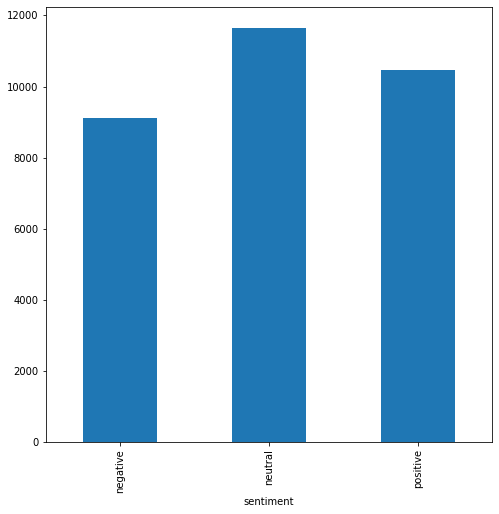

In [33]:
fig=plt.figure(figsize=(8,8))
data.groupby("sentiment").id.count().plot.bar()
plt.show()

In [34]:
data["size text"] =data['text'].str.len()
data.describe()

id  Measure of Evidence Strength of sent message  \
count  31232.000000                                  31232.000000   
mean   10576.775359                                      0.501672   
std     8010.753795                                      0.288681   
min        0.000000                                      0.000050   
25%     3476.000000                                      0.250603   
50%     8662.000000                                      0.503246   
75%    17071.500000                                      0.751752   
max    27480.000000                                      0.999997   

         sender age     size text  
count  31232.000000  31232.000000  
mean      46.004066    103.752722  
std       19.980344    128.878248  
min       12.000000      1.000000  
25%       29.000000     41.000000  
50%       46.000000     72.000000  
75%       63.000000    115.000000  
max       80.000000   4363.000000

In [35]:

def process(text):
    text=text.lower()
    
    text=text.replace('.','<PERIOD>')
    text=text.replace(',','<COMMA>')
    text=text.replace('"','<QUOTATION MARK>')
    text=text.replace(';','<SEMICOLON>')
    text=text.replace('!','<EXCLAMATION MARK>')
    text=text.replace('.','<QUESTION MARK>')
    text=text.replace('(','<LEFT PAREN>')
    text=text.replace(')','<RIGHT PAREN>')
    text=text.replace('.','<PERIOD>')
    text=text.replace('$','<DOLLAR')
    text=text.replace('&','<AND SIGN>')
    text=text.replace('+','<PLUS>')
    text=text.replace('-','<MINUS ')
    text=text.replace('#'," ")
    text=text.replace('*'," ")
    text=text.replace('@','a')
    text=text.replace('_'," ")
    text=text.replace('<'," ")
    text=text.replace('>'," ")
    text=text.replace('{'," ")
    text=text.replace('}'," ")
    
    text=re.sub(r"what`s"," what is ", text)
    text=re.sub(r"\`s"," is ", text)
    text=re.sub(r"it`s"," it is ", text)
    text=re.sub(r"it's"," it is ", text)
    text=re.sub(r"\`ve"," have ", text)
    text=re.sub(r"can`t"," can not", text)
    text=re.sub(r"does`t"," does not", text)
    text=re.sub(r"don`t"," do not", text)
    text=re.sub(r"n`t"," not ", text)
    text=re.sub(r"i`m"," i am ", text)
    text=re.sub(r"i'm"," i am ", text)
    text=re.sub(r"\`re"," are ", text)
    text=re.sub(r"\`d"," would", text)
    text=re.sub(r"\`ll"," will", text)
    text=re.sub(r"\`scuse"," excuse", text)
    text=text.strip('')

    
    return text

In [36]:
data['text']=data["text"].apply(process)

In [37]:
texts=' '.join(data['text'])
texts

" lucky EXCLAMATION MARK  that is  awesome im glad i can make sumone smile my teratoma has a cavity and is experiencing male MINUS pattern baldness on jacksonville beach walking in the cold      water   but have to work in the morning   ily   LEFT PAREN ` MINUS ` RIGHT PAREN   kpai  i am  cooking meatballs for lunch  yaaayyy  PERIOD  PERIOD  PERIOD   johnson: have a good night and then you find out today they had there first kiss EXCLAMATION MARK    full time in tonight is  game COMMA  ashington 0  MINUS  5 whitley bay nice app but doesn't really have what  i am  looking for PERIOD  handy for me when i need to plan out everything that needs to be done PERIOD  😊👍 igotlockedoutofmyplanner PERIOD afterenteringmypaascodetheappsaidthatthepasscodewaswrong PERIOD itwasnotwrong PERIOD isuspectedasystemglitchandcontactedthedeveloperonjune17thofthisyear PERIOD ihaven'treceivedanyresponseyet PERIOD ifoundmywayaroundthisproblembythistime PERIOD iwillnotrenewmysubscriptionanymore PERIOD iwilllookfo

In [38]:
import wordninja
text=wordninja.split(texts)
text

['lucky',
 'EXCLAMATION',
 'MARK',
 'that',
 'is',
 'awesome',
 'im',
 'glad',
 'i',
 'can',
 'make',
 'sum',
 'one',
 'smile',
 'my',
 'ter',
 'atoma',
 'has',
 'a',
 'cavity',
 'and',
 'is',
 'experiencing',
 'male',
 'MINUS',
 'pattern',
 'baldness',
 'on',
 'jacksonville',
 'beach',
 'walking',
 'in',
 'the',
 'cold',
 'water',
 'but',
 'have',
 'to',
 'work',
 'in',
 'the',
 'morning',
 'i',
 'ly',
 'LEFT',
 'P',
 'AREN',
 'MINUS',
 'RIGHT',
 'P',
 'AREN',
 'kpa',
 'i',
 'i',
 'am',
 'cooking',
 'meatballs',
 'for',
 'lunch',
 'yaa',
 'ayy',
 'y',
 'PERIOD',
 'PERIOD',
 'PERIOD',
 'johnson',
 'have',
 'a',
 'good',
 'night',
 'and',
 'then',
 'you',
 'find',
 'out',
 'today',
 'they',
 'had',
 'there',
 'first',
 'kiss',
 'EXCLAMATION',
 'MARK',
 'full',
 'time',
 'in',
 'tonight',
 'is',
 'game',
 'COMMA',
 'ashing',
 'ton',
 '0',
 'MINUS',
 '5',
 'whitley',
 'bay',
 'nice',
 'app',
 'but',
 "doesn't",
 'really',
 'have',
 'what',
 'i',
 'am',
 'looking',
 'for',
 'PERIOD',
 'han

In [39]:
from collections import Counter
vocabulary=texts.split()
word_counts=Counter(vocabulary)
word_counts

Counter({'lucky': 65,
         'EXCLAMATION': 15237,
         'MARK': 16284,
         'that': 3505,
         'is': 9376,
         'awesome': 359,
         'im': 667,
         'glad': 147,
         'i': 19003,
         'can': 1954,
         'make': 657,
         'sumone': 2,
         'smile': 36,
         'my': 6034,
         'teratoma': 1,
         'has': 869,
         'a': 27891,
         'cavity': 1,
         'and': 7457,
         'experiencing': 7,
         'male': 6,
         'MINUS': 3456,
         'pattern': 4,
         'baldness': 1,
         'on': 3313,
         'jacksonville': 1,
         'beach': 51,
         'walking': 26,
         'in': 4145,
         'the': 13048,
         'cold': 122,
         'water': 51,
         'but': 3622,
         'have': 3679,
         'to': 13485,
         'work': 1362,
         'morning': 467,
         'ily': 18,
         'LEFT': 1490,
         'PAREN': 3150,
         '`': 36,
         'RIGHT': 1660,
         'kpai': 1,
         'am': 2905,
     

In [40]:
vocabulary_words= [word for word in vocabulary if word_counts[word]>5]

In [41]:
def avg_word(sentence):
    try:
        words=sentence.split()
        return (sum(len(word) for word in words)/len(words))
    except:
        return 0

In [42]:
avg_word(texts)

4.827861816466937

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

data['sentiment']=labelencoder.fit_transform(data['sentiment'])
data.head()

id                                               text  sentiment  \
0    379           lucky EXCLAMATION MARK  that is  awesome          2   
1  24124                    im glad i can make sumone smile          2   
2   4286  my teratoma has a cavity and is experiencing m...          0   
3   1783  on jacksonville beach walking in the cold     ...          0   
4   5581                                               kpai          2   

         date      time  Measure of Evidence Strength of sent message  \
0  2014-11-22  17:26:20                                      0.901658   
1  2018-07-22  07:58:08                                      0.012167   
2  2015-06-26  02:52:12                                      0.603517   
3  2020-12-05  23:53:36                                      0.814155   
4  2018-07-15  03:49:50                                      0.684390   

                                sent message address  \
0  901 Darren Junction Apt. 862\nWest Carlaland, ...   
1                   Unit 5916 Box 9073\nDPO AE 63754   
2            56947 Brooks Loop\nSouth John, WV 93156   
3                918 Sims River\nNormaland, AL 09337   
4    7721 Rebecca Squares\nEast Michaelton, VA 57699   

                            received message address  sender age  \
0    2002 Jackson Ridges\nNew Kevinchester, MA 86337          44   
1     77157 Fletcher Walk\nSouth Hollyfurt, VI 34801          34   
2         8471 Marco Village\nNew Jennifer, AL 91049          13   
3    6473 Oneal River\nLake Stephaniemouth, AZ 15555          77   
4  07031 Lauren Spur Apt. 500\nLake Michelle, LA ...          75   

  Message Channel sender gender receiver gender  size text  
0           email          male            male         22  
1        chat app          male            male         31  
2    social media          male          female         66  
3           email        female          female        100  
4           email          male            male          4

In [44]:
labelencoder.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [45]:
data.drop('date',axis=1,inplace=True)
data.drop('time',axis=1,inplace=True)
data.drop('sent message address',axis=1,inplace=True)
data.drop('received message address',axis=1,inplace=True)
data.drop('Message Channel',axis=1,inplace=True)
data.drop('size text',axis=1,inplace=True)

In [46]:
data

id                                               text  sentiment  \
0        379           lucky EXCLAMATION MARK  that is  awesome          2   
1      24124                    im glad i can make sumone smile          2   
2       4286  my teratoma has a cavity and is experiencing m...          0   
3       1783  on jacksonville beach walking in the cold     ...          0   
4       5581                                               kpai          2   
...      ...                                                ...        ...   
31227   1206  still feel like craaaap and like everyone on e...          1   
31228   8103                           doesn't sync to calendar          0   
31229   9067  after the update widget stopped reacting but a...          1   
31230   1407   bye  EXCLAMATION MARK  have a great time bein...          2   
31231  11654   i am draggingmyselfoutofthelowpoint PERIOD sl...          1   

       Measure of Evidence Strength of sent message  sender age sender gender  \
0                                          0.901658          44          male   
1                                          0.012167          34          male   
2                                          0.603517          13          male   
3                                          0.814155          77        female   
4                                          0.684390          75          male   
...                                             ...         ...           ...   
31227                                      0.273405          68        female   
31228                                      0.447326          74        female   
31229                                      0.559709          37          male   
31230                                      0.057169          32        female   
31231                                      0.562946          64          male   

      receiver gender  
0                male  
1                male  
2              female  
3              female  
4                male  
...               ...  
31227            male  
31228            male  
31229            male  
31230            male  
31231            male  

[31232 rows x 7 columns]

In [47]:
dup=data.duplicated(subset=['id'])
print(dup)

0        False
1        False
2        False
3        False
4        False
         ...  
31227     True
31228     True
31229     True
31230     True
31231    False
Length: 31232, dtype: bool


In [48]:
data.drop('id',axis=1,inplace=True)
data

text  sentiment  \
0               lucky EXCLAMATION MARK  that is  awesome          2   
1                        im glad i can make sumone smile          2   
2      my teratoma has a cavity and is experiencing m...          0   
3      on jacksonville beach walking in the cold     ...          0   
4                                                   kpai          2   
...                                                  ...        ...   
31227  still feel like craaaap and like everyone on e...          1   
31228                           doesn't sync to calendar          0   
31229  after the update widget stopped reacting but a...          1   
31230   bye  EXCLAMATION MARK  have a great time bein...          2   
31231   i am draggingmyselfoutofthelowpoint PERIOD sl...          1   

       Measure of Evidence Strength of sent message  sender age sender gender  \
0                                          0.901658          44          male   
1                                          0.012167          34          male   
2                                          0.603517          13          male   
3                                          0.814155          77        female   
4                                          0.684390          75          male   
...                                             ...         ...           ...   
31227                                      0.273405          68        female   
31228                                      0.447326          74        female   
31229                                      0.559709          37          male   
31230                                      0.057169          32        female   
31231                                      0.562946          64          male   

      receiver gender  
0                male  
1                male  
2              female  
3              female  
4                male  
...               ...  
31227            male  
31228            male  
31229            male  
31230            male  
31231            male  

[31232 rows x 6 columns]

In [49]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(data,random_state=42,test_size=0.2,shuffle=True)
X_train=train.text
X_test=test.text
print(X_train.shape)
print(X_test.shape)

(24985,)
(6247,)


In [50]:
df=pd.read_csv('data2.csv')
data

text  sentiment  \
0               lucky EXCLAMATION MARK  that is  awesome          2   
1                        im glad i can make sumone smile          2   
2      my teratoma has a cavity and is experiencing m...          0   
3      on jacksonville beach walking in the cold     ...          0   
4                                                   kpai          2   
...                                                  ...        ...   
31227  still feel like craaaap and like everyone on e...          1   
31228                           doesn't sync to calendar          0   
31229  after the update widget stopped reacting but a...          1   
31230   bye  EXCLAMATION MARK  have a great time bein...          2   
31231   i am draggingmyselfoutofthelowpoint PERIOD sl...          1   

       Measure of Evidence Strength of sent message  sender age sender gender  \
0                                          0.901658          44          male   
1                                          0.012167          34          male   
2                                          0.603517          13          male   
3                                          0.814155          77        female   
4                                          0.684390          75          male   
...                                             ...         ...           ...   
31227                                      0.273405          68        female   
31228                                      0.447326          74        female   
31229                                      0.559709          37          male   
31230                                      0.057169          32        female   
31231                                      0.562946          64          male   

      receiver gender  
0                male  
1                male  
2              female  
3              female  
4                male  
...               ...  
31227            male  
31228            male  
31229            male  
31230            male  
31231            male  

[31232 rows x 6 columns]

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df['sentiment']=labelencoder.fit_transform(df['sentiment'])
df.head()

text  sentiment  \
0                                ['lucki', 'awesom']          2   
1            ['glad', 'make', 'sum', 'one', 'smile']          2   
2  ['atom', 'caviti', 'experienc', 'male', 'patte...          0   
3  ['jacksonvil', 'ch', 'walk', 'cold', 'w', 'h',...          0   
4                                             ['pa']          2   

   Measure of Evidence Strength of sent message  sender age sender gender  \
0                                      0.901658          44          male   
1                                      0.012167          34          male   
2                                      0.603517          13          male   
3                                      0.814155          77        female   
4                                      0.684390          75          male   

  receiver gender  
0            male  
1            male  
2          female  
3          female  
4            male

In [52]:
df.drop('sender age',axis=1,inplace=True)
df.drop('sender gender',axis=1,inplace=True)
df.drop('receiver gender',axis=1,inplace=True)
df.drop('Mesure of Evidence Strength of sent message',axis=1,inplace=True)

KeyError: "['Mesure of Evidence Strength of sent message'] not found in axis"

In [ ]:
texts=' '.join(df['text'])
texts

"['lucki', 'awesom'] ['glad', 'make', 'sum', 'one', 'smile'] ['atom', 'caviti', 'experienc', 'male', 'pattern', 'bold'] ['jacksonvil', 'ch', 'walk', 'cold', 'w', 'h', 'work', 'morn', 'ly'] ['pa'] ['cook', 'meatbal', 'lunch', 'yea'] ['johnson', 'good', 'night'] ['find', 'today', 'first', 'kiss'] ['full', 'time', 'night', 'game', 'ask', 'ton', '0', '5', 'whitney', 'bay'] ['nice', 'pp', 'realli', 'look'] ['handi', 'need', 'plan', 'everyth', 'need', 'done', 'blush', '1'] ['got', 'lock', 'planner', 'enter', 'pa', 'code', 'pp', 'said', 'pass', 'code', 'wrong', 'wrong', 'suspect', 'system', 'pitch', 'contract', 'develop', 'june', '17', 'th', 'year', 'receiv', 'respons', 'yet', 'found', 'way', 'around', 'problem', 'time', 'notr', 'new', 'subscript', 'anymor', 'look', 'anoth', 'pp', 'develop', 'better', 'custom', 'servic'] ['supernatur', 'good', 'love'] ['list', 'prioriti', 'calendar', 'view', 'e', 'pp', 'best'] ['would', 'stop', 'tell', 'give', 'rate', 'henc', 'lower', 'score', 'pretti', 'good

In [ ]:
from sklearn.model_selection import train_test_split

ttrain, ttest=train_test_split(df,random_state=42,test_size=0.2,shuffle=True)
Xx_train=train.text
Xx_test=test.text
print(Xx_train.shape)
print(Xx_test.shape)

(24985,)
(6247,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

nb_pipeline1=Pipeline([
    ['tfidf',TfidfVectorizer(stop_words='english')],
    ['classifier',svm.SVC(kernel='linear')],
])

nb_pipeline1.fit(Xx_train,train['sentiment'])

prediction=nb_pipeline1.predict(Xx_test)

print('test accuracy is {}'.format(accuracy_score(test['sentiment'], prediction)))



test accuracy is 0.6387065791579959


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

nb_pipeline=Pipeline([
    ['tfidf',TfidfVectorizer(stop_words='english')],
    ['classifier',MultinomialNB(fit_prior=True,class_prior=None)],
])

nb_pipeline.fit(Xx_train,train['sentiment'])

prediction=nb_pipeline.predict(Xx_test)

print('test accuracy is {}'.format(accuracy_score(test['sentiment'], prediction)))



test accuracy is 0.5838002241075716


In [ ]:
import joblib
joblib.dump(nb_pipeline1,'modele.sav')

['modele.sav']